In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 시간 측정을 위한 시간 모듈
import datetime

# 한 인디언 부족의 당뇨병 문제 예측
- 데이터를 가지고 당뇨병이 있는지 없을지 예측한다.
- train.csv를 학습시켜 test.csv를 예측시킨다. 

### 데이터를 읽어온다.

In [2]:
train_df = pd.read_csv("data/diabetes_train.csv")
test_df = pd.read_csv("data/diabetes_test.csv")

### 데이터프레임 정보 확인

결측치가 없는것을 확인할 수 있다.

### 데이터 전처리

In [3]:
data = pd.concat((train_df, test_df))
data.reset_index(drop=True, inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NaN
764,2,122,70,27,0,36.8,0.340,27,NaN
765,5,121,72,23,112,26.2,0.245,30,NaN
766,1,126,60,0,0,30.1,0.349,47,NaN


In [4]:
data.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     168
dtype: int64

### 머신러닝으로 데이터 전처리

In [5]:
# data.head()

In [6]:
df1 = data.copy()
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NaN
764,2,122,70,27,0,36.8,0.340,27,NaN
765,5,121,72,23,112,26.2,0.245,30,NaN
766,1,126,60,0,0,30.1,0.349,47,NaN


In [7]:
# 전부다 관련이 있는 것 같다.
# Outcome만 삭제하도록 하자
df1.drop("Outcome", axis=1, inplace=True)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
# temp = X.copy()
# temp["Outcome"] = y

In [9]:
# # 비율을 확인한다.
# # temp.groupby("Pregnancies")["Outcome"].mean()
# temp["Pregnancies"] = temp.groupby("Pregnancies")["Outcome"].transform("mean")
# temp

In [10]:
# # 값을 비율로 변경한다.
# temp["Pregnancies"] = temp.groupby("Pregnancies")["Outcome"].transform("mean")
# temp["Glucose"] = temp.groupby("Glucose")["Outcome"].transform("mean")
# temp["BloodPressure"] = temp.groupby("BloodPressure")["Outcome"].transform("mean")
# temp["SkinThickness"] = temp.groupby("SkinThickness")["Outcome"].transform("mean")
# temp["Insulin"] = temp.groupby("Insulin")["Outcome"].transform("mean")
# temp["BMI"] = temp.groupby("BMI")["Outcome"].transform("mean")
# temp["DiabetesPedigreeFunction"] = temp.groupby("DiabetesPedigreeFunction")["Outcome"].transform("mean")
# temp["Age"] = temp.groupby("Age")["Outcome"].transform("mean")

# temp

In [11]:
# # 평균
# temp["Mean"] = 0
# # 최대
# temp["Max"] = 0
# # 최소
# temp["Min"] = 0
# # 최대-최소
# temp["Diff"] = 0
# # std
# temp["Std"] = 0


In [12]:
# temp["Mean"] = temp.mean(axis=1)
# temp["Max"] = temp.max(axis=1)
# temp["Min"] = temp.min(axis=1)
# temp["Diff"] = temp["Max"] - temp["Min"]
# temp["Std"] = temp.std(axis=1)
# temp

In [13]:
# df1["Mean"] = temp["Mean"]
# df1["Max"] = temp["Max"] 
# df1["Min"] = temp["Min"]
# df1["Diff"] = temp["Diff"] 
# df1["Std"] = temp["Std"] 
# df1

In [14]:
# 데이터를 준비한다.
# 학습 데이터 개수
n_train = len(train_df)
# 예측 데이터 개수
n_test = len(test_df)

X_train = df1[:n_train]
y_train = train_df["Outcome"]

display(X_train)
display(y_train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
595,0,188,82,14,185,32.0,0.682,22
596,0,67,76,0,0,45.3,0.194,46
597,1,89,24,19,25,27.8,0.559,21
598,1,173,74,0,0,36.8,0.088,38


0      1
1      0
2      1
3      0
4      1
      ..
595    1
596    0
597    0
598    1
599    0
Name: Outcome, Length: 600, dtype: int64

In [15]:
# 표준화 작업
scaler1 = StandardScaler()
scaler1.fit(X_train)
X_train = scaler1.transform(X_train)
X_train

array([[ 0.64896283,  0.85394206,  0.17154252, ...,  0.21175498,
         0.43304279,  1.41559569],
       [-0.83948403, -1.0767362 , -0.13862979, ..., -0.66292137,
        -0.38594131, -0.19287544],
       [ 1.24434157,  1.92654109, -0.24202057, ..., -1.07526879,
         0.56657281, -0.10821907],
       ...,
       [-0.83948403, -0.95415345, -2.30983602, ..., -0.51297685,
         0.2312641 , -1.0394392 ],
       [-0.83948403,  1.62008422,  0.2749333 , ...,  0.61160703,
        -1.16635008,  0.39971919],
       [-0.83948403, -0.34123972, -1.58610061, ..., -1.10025955,
        -0.21977063, -0.61615732]])

### 기본 모델 사용하기

In [16]:
# 데이터를 다른 변수에 담는다.
model1 = KNeighborsClassifier()
model2 = LogisticRegression()
model3 = SVC(probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = (
    ("model1", model1), ("model2", model2), ("model3", model3), 
    ("model4", model4), ("model5", model5), ("model6", model6), 
    ("model7", model7), ("model8", model8), ("model9", model9), 
)

model10 = VotingClassifier(estimators=model_list, voting="hard")
model11 = VotingClassifier(estimators=model_list, voting="soft")

In [17]:
# 사용할 알고리즘을 리스트에 담는다.
check_list = [
    model1, model2, model3, model4, model5, model6,
    model7, model8, model9, model10, model11
]
# 교차 검증 평균을 담을 리스트
score_list = []

In [18]:
# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

for ml in check_list:
    score = cross_val_score(ml, X_train, y_train, scoring="f1", cv=kfold)
    score_list.append(score.mean())
    
score_list

[0.5578184620869633,
 0.6224112881819782,
 0.5794236719645153,
 0.5608934460670179,
 0.6207920049715715,
 0.5740162169981409,
 0.6261354321758239,
 0.5822508955331996,
 0.604493551302062,
 0.6198707346419017,
 0.6041182725083654]

In [19]:
# 시각화를 위해 데이터 프레임을 생성한다.
results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Score
0,GradianBoost,0.626135
1,LogisticRegression,0.622411
2,RandomForest,0.620792
3,Voting(Hard),0.619871
4,XGBoost,0.604494
5,Voting(Soft),0.604118
6,LGBM,0.582251
7,SVC,0.579424
8,AdaBoost,0.574016
9,DecisionTree,0.560893


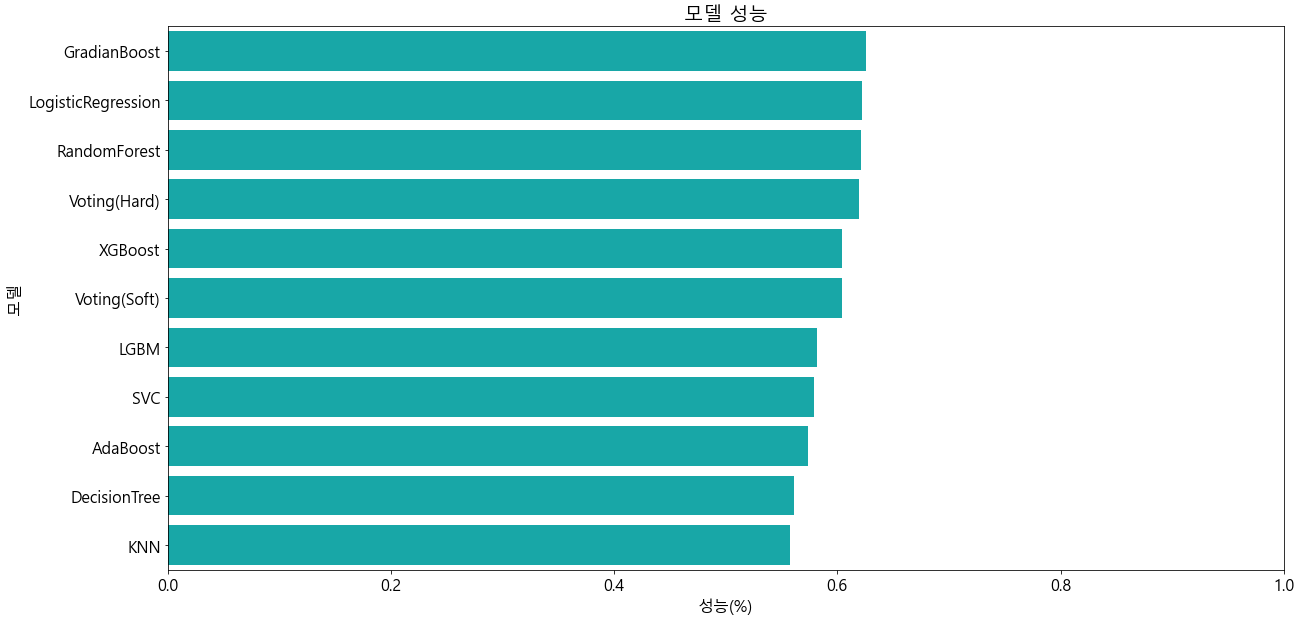

In [20]:
# 성능 평가를 중간결과를 시각화한다.
sns.barplot(data=results_df, x="Score", y="Model", color="c")

plt.title("모델 성능")
plt.xlabel("성능(%)")
plt.ylabel("모델")
plt.xlim(0, 1)

plt.show()

### hyper parameter 튜닝하기

In [21]:
# KNN
params = {
    "n_neighbors": list(range(1, 11))
}

# 사용할 모델 객체를 생성한다.
model1 = KNeighborsClassifier()

# 최적의 하이퍼 파라미터를 찾는다.
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring="f1", cv=kfold)
grid_clf1.fit(X_train, y_train)

# 결과 출력
print(f"최적의 하이퍼 파라미터 : {grid_clf1.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf1.best_score_}")

최적의 하이퍼 파라미터 : {'n_neighbors': 9}
최적의 모델 평균 성능 : 0.5800399787562818


In [22]:
# LogisticRegression
# penalty : 규제의 종류(l1, l2, elasticnet(l1,l2 모두 사용하는것), none)
# C: 규제의 강도 
params = {
    "penalty" : ["l1", "l2", "elasticnet", "none"],
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring="f1", cv=kfold)
start = datetime.datetime.now()

grid_clf2.fit(X_train, y_train)

# end = datetime.datetime.now()
print(f"최적의 하이퍼 파라미터 : {grid_clf2.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf2.best_score_}")
# print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2'}
최적의 모델 평균 성능 : 0.6261550471707725


In [23]:
# SVM(SVC)
# SVM은 l2로 penalty가 고정되어 있다.
# C: 규제의 강도 
params = {
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = SVC()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring="f1", cv=kfold)
# start = datetime.datetime.now()

grid_clf3.fit(X_train, y_train)

# end = datetime.datetime.now()
print(f"최적의 하이퍼 파라미터 : {grid_clf3.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf3.best_score_}")
# print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'C': 1}
최적의 모델 평균 성능 : 0.5794236719645153


In [24]:
# DecisonTree
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model4 = DecisionTreeClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring='f1', cv=kfold)
# start = datetime.datetime.now()

grid_clf4.fit(X_train, y_train)

# end = datetime.datetime.now()
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf4.best_score_}')
# print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'max_depth': 6}
최적의 모델 평균 성능 : 0.5814615280667098


In [25]:
# RandomForest
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model5 = RandomForestClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring='f1', cv=kfold)

# start = datetime.datetime.now()

grid_clf5.fit(X_train, y_train)

# end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf5.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf5.best_score_}')
# print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'max_depth': 8, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.6384985949704431


In [26]:
# AdaBoost
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model6 = AdaBoostClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf6 = GridSearchCV(model6, param_grid=params, scoring='f1', cv=kfold)

# start = datetime.datetime.now()

grid_clf6.fit(X_train, y_train)

# end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf6.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf6.best_score_}')
# print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 150}
최적의 모델 평균 성능 : 0.6142568488498721


In [27]:
# GradientBoosting
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model7 = GradientBoostingClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf7 = GridSearchCV(model7, param_grid=params, scoring='f1', cv=kfold)

# start = datetime.datetime.now()

grid_clf7.fit(X_train, y_train)

# end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf7.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf7.best_score_}')
# print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 100}
최적의 모델 평균 성능 : 0.6261354321758239


In [28]:
# Light GBM
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model8 = LGBMClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf8 = GridSearchCV(model8, param_grid=params, scoring='f1', cv=kfold)

# start = datetime.datetime.now()

grid_clf8.fit(X_train, y_train)

# end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf8.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf8.best_score_}')
# print(f'총 튜닝 시간 : {end - start}')


최적의 하이퍼 파라미터 : {'learning_rate': 0.01, 'n_estimators': 250}
최적의 모델 평균 성능 : 0.6205126412443485


In [29]:
# XGBoost
# booster : 내부에 사용할 알고리즘
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'booster' : ["gbtree", "gblinear"],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model9 = XGBClassifier(random_state=1, silent=True, verbosity=0 )
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf9 = GridSearchCV(model9, param_grid=params, scoring='f1', cv=kfold)

# start = datetime.datetime.now()

grid_clf9.fit(X_train, y_train)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf9.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf9.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 150}
최적의 모델 평균 성능 : 0.6358432907826025
총 튜닝 시간 : 0:08:06.372659


In [30]:
# voting
# SVC에서 확률을 확인할 수 있도록 설정한다.
grid_clf3.best_estimator_.probability = True

model_list = (
    ("model1", grid_clf1.best_estimator_),
    ("model2", grid_clf2.best_estimator_),
    ("model3", grid_clf3.best_estimator_),
    ("model4", grid_clf4.best_estimator_),
    ("model5", grid_clf5.best_estimator_),
    ("model6", grid_clf6.best_estimator_),
    ("model7", grid_clf7.best_estimator_),
    ("model8", grid_clf8.best_estimator_),
    ("model9", grid_clf9.best_estimator_),
)

model10 = VotingClassifier(estimators=model_list, voting="hard")
model11 = VotingClassifier(estimators=model_list, voting="soft")

In [31]:
# voting 모델 교차 검증
r10 = cross_val_score(model10, X_train, y_train, scoring="f1", cv=kfold)
r11 = cross_val_score(model11, X_train, y_train, scoring="f1", cv=kfold)

In [32]:
# 시각화를 위한 데이터 프레임을 생성한다.

score_list = [
    grid_clf1.best_score_, grid_clf2.best_score_, grid_clf3.best_score_, 
    grid_clf4.best_score_, grid_clf5.best_score_, grid_clf6.best_score_, 
    grid_clf7.best_score_, grid_clf8.best_score_, grid_clf9.best_score_, 
    r10.mean(), r11.mean()
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Score
0,RandomForest,0.638499
1,XGBoost,0.635843
2,Voting(Hard),0.630253
3,LogisticRegression,0.626155
4,GradianBoost,0.626135
5,LGBM,0.620513
6,AdaBoost,0.614257
7,Voting(Soft),0.606399
8,DecisionTree,0.581462
9,KNN,0.580040


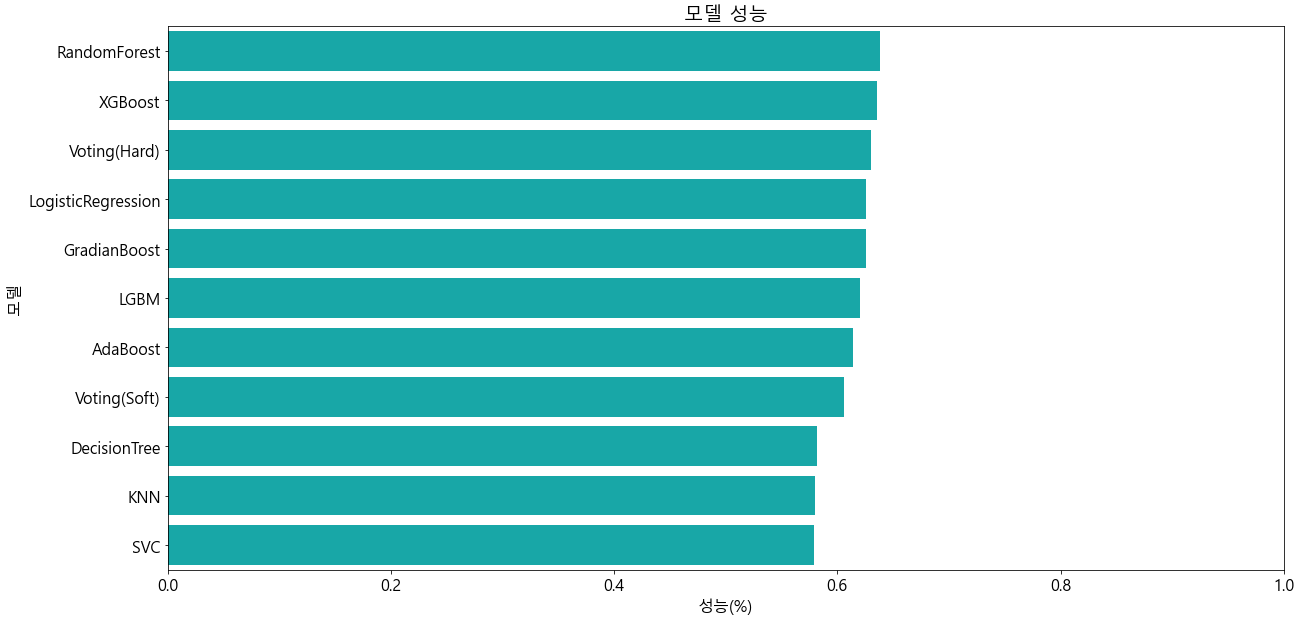

In [33]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x="Score", y="Model", color="c")

plt.title("모델 성능")
plt.xlabel("성능(%)")
plt.ylabel("모델")
plt.xlim(0,1)

plt.show()

### 전체 데이터를 학습과 검증으로 나눠서 최종 평가를 실시한다.

In [34]:
model1 = grid_clf1.best_estimator_
model2 = grid_clf2.best_estimator_
model3 = grid_clf3.best_estimator_
model4 = grid_clf4.best_estimator_
model5 = grid_clf5.best_estimator_
model6 = grid_clf6.best_estimator_
model7 = grid_clf7.best_estimator_
model8 = grid_clf8.best_estimator_
model9 = grid_clf9.best_estimator_


In [35]:
# 학습용과 검증용으로 나눈다.
x1, x2, y1, y2 = train_test_split(X_train, y_train, test_size=3, random_state=1)


In [36]:
# 학습용 데이터로 학습을 시킨다.
model1.fit(x1, y1)
model2.fit(x1, y1)
model3.fit(x1, y1)
model4.fit(x1, y1)
model5.fit(x1, y1)
model6.fit(x1, y1)
model7.fit(x1, y1)
model8.fit(x1, y1)
model9.fit(x1, y1)
model10.fit(x1, y1)
model11.fit(x1, y1)

VotingClassifier(estimators=(('model1', KNeighborsClassifier(n_neighbors=9)),
                             ('model2', LogisticRegression(C=0.1)),
                             ('model3', SVC(C=1, probability=True)),
                             ('model4',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=1)),
                             ('model5',
                              RandomForestClassifier(max_depth=8,
                                                     n_estimators=50,
                                                     random_state=1)),
                             ('model6',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                    

In [37]:
# 검증 데이터를 통해 예측 결과를 가져온다
y_pred1 = model1.predict(x2)
y_pred2 = model2.predict(x2)
y_pred3 = model3.predict(x2)
y_pred4 = model4.predict(x2)
y_pred5 = model5.predict(x2)
y_pred6 = model6.predict(x2)
y_pred7 = model7.predict(x2)
y_pred8 = model8.predict(x2)
y_pred9 = model9.predict(x2)
y_pred10 = model10.predict(x2)
y_pred11 = model11.predict(x2)


In [38]:
# 진짜 결과와 비교해서 평가를 실시한다.
r1 = f1_score(y2, y_pred1)
r2 = f1_score(y2, y_pred2)
r3 = f1_score(y2, y_pred3)
r4 = f1_score(y2, y_pred4)
r5 = f1_score(y2, y_pred5)
r6 = f1_score(y2, y_pred6)
r7 = f1_score(y2, y_pred7)
r8 = f1_score(y2, y_pred8)
r9 = f1_score(y2, y_pred9)
r10 = f1_score(y2, y_pred10)
r11 = f1_score(y2, y_pred11)

In [39]:
results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11]
})

# score 기준으로 정렬
results_df.sort_values(by="Score", ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Score
0,KNN,1.0
1,LogisticRegression,1.0
2,SVC,1.0
3,DecisionTree,1.0
4,RandomForest,1.0
5,AdaBoost,1.0
6,GradianBoost,1.0
7,LGBM,1.0
8,XGBoost,1.0
9,Voting(Hard),1.0


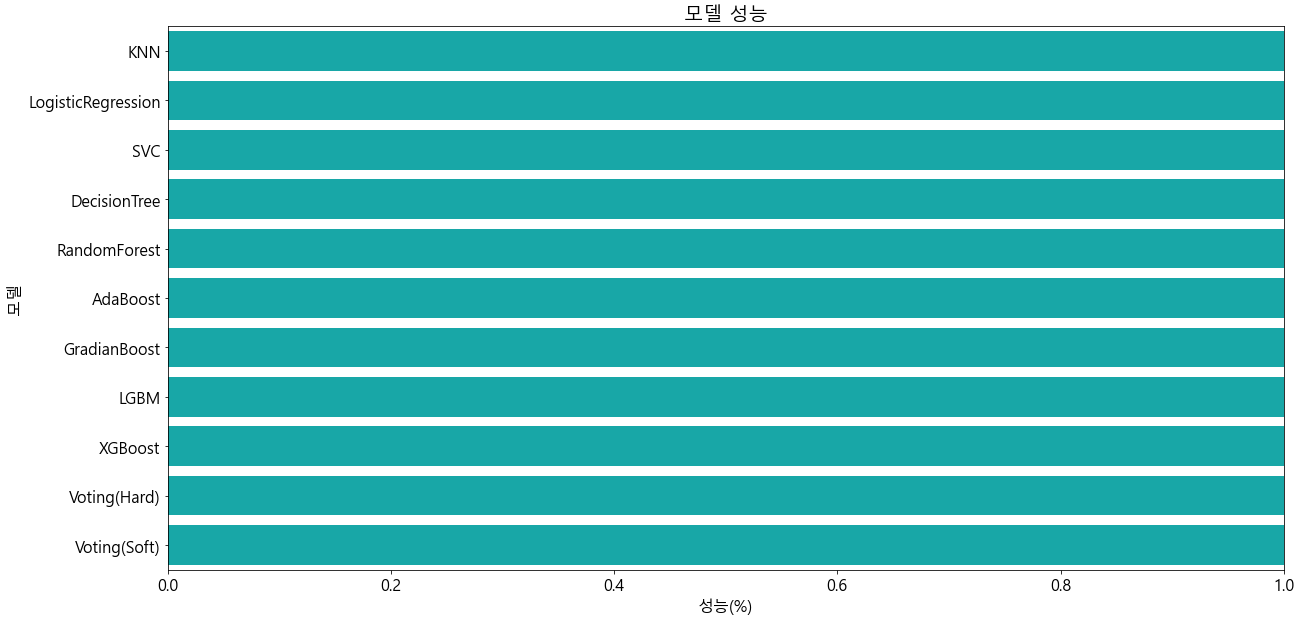

In [40]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()


### 최종 선정된 모델에 모든 데이터를 학습시킨다.
- Voting(Soft)로 하겠습니다.
- 이유는.. 난 soft하기 떄문..?

In [75]:
model3

SVC(C=1, probability=True)

In [76]:
model3.fit(X_train, y_train)

SVC(C=1, probability=True)

### 결과를 예측한다.

In [77]:
X_test = df1[n_train:]
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
600,1,108,88,19,0,27.1,0.400,24
601,6,96,0,0,0,23.7,0.190,28
602,1,124,74,36,0,27.8,0.100,30
603,7,150,78,29,126,35.2,0.692,54
604,4,183,0,0,0,28.4,0.212,36
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [78]:
X_test = scaler1.transform(X_test)
X_test

array([[-0.83948403, -0.37188541,  0.9986687 , ..., -0.60044449,
        -0.24054196, -0.78547007],
       [ 0.64896283, -0.73963365, -3.55052529, ..., -1.02528729,
        -0.86368204, -0.44684457],
       [-0.83948403,  0.11844558,  0.2749333 , ..., -0.51297685,
        -1.13074208, -0.27753182],
       ...,
       [ 0.35127346,  0.02650852,  0.17154252, ..., -0.71290288,
        -0.70047869, -0.27753182],
       [-0.83948403,  0.17973695, -0.44880211, ..., -0.2255832 ,
        -0.39187598,  1.16162657],
       [-0.83948403, -0.83157071,  0.06815175, ..., -0.18809707,
        -0.49276533, -0.87012645]])

In [79]:
y_pred = model3.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [80]:
y_pred_proba = model3.predict_proba(X_test)
y_pred_proba

array([[0.87361851, 0.12638149],
       [0.79257678, 0.20742322],
       [0.84138218, 0.15861782],
       [0.21662502, 0.78337498],
       [0.20067169, 0.79932831],
       [0.72884882, 0.27115118],
       [0.22873424, 0.77126576],
       [0.8968827 , 0.1031173 ],
       [0.55249408, 0.44750592],
       [0.90263181, 0.09736819],
       [0.88669098, 0.11330902],
       [0.15597938, 0.84402062],
       [0.15241711, 0.84758289],
       [0.62212864, 0.37787136],
       [0.2344101 , 0.7655899 ],
       [0.86318564, 0.13681436],
       [0.83088832, 0.16911168],
       [0.85897173, 0.14102827],
       [0.42631641, 0.57368359],
       [0.4345207 , 0.5654793 ],
       [0.81171016, 0.18828984],
       [0.76837505, 0.23162495],
       [0.22320426, 0.77679574],
       [0.83773422, 0.16226578],
       [0.84188681, 0.15811319],
       [0.83614413, 0.16385587],
       [0.86894577, 0.13105423],
       [0.76107504, 0.23892496],
       [0.56257169, 0.43742831],
       [0.83631389, 0.16368611],
       [0.

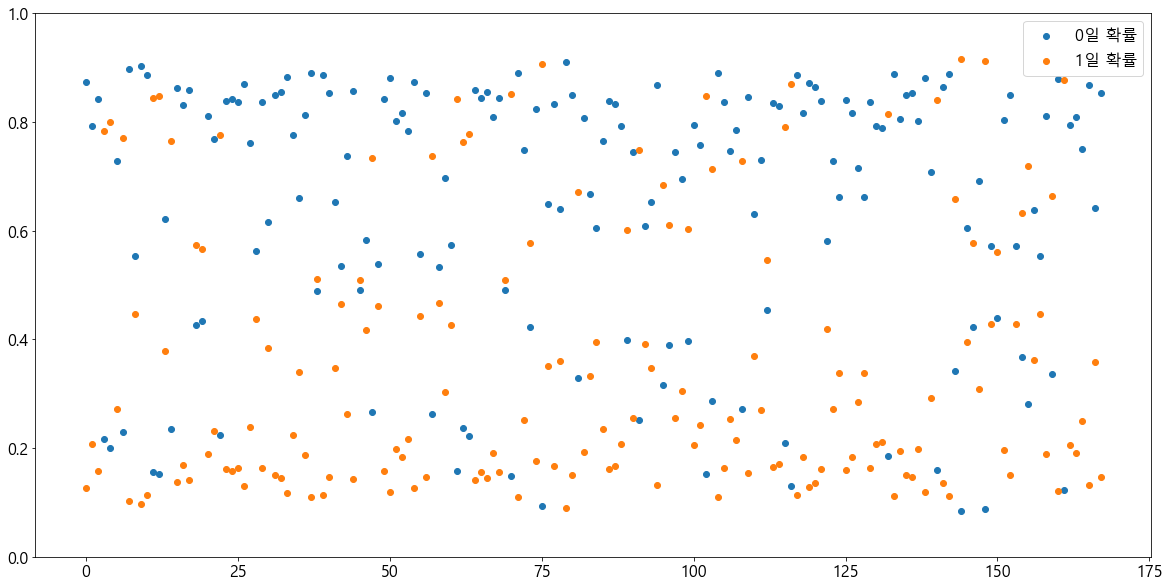

In [81]:
# 0일 확률들 
a10 = y_pred_proba[:, 0]
# 1일 확률들
a11 = y_pred_proba[:, 1]

plt.scatter(list(range(len(a10))), a10, label="0일 확률")
plt.scatter(list(range(len(a11))), a11, label="1일 확률")
plt.ylim(0,1 )
plt.legend()
plt.show()

In [82]:
# 예측 결과 저장한다.
test_df["Outcome"] = y_pred

test_df.to_csv("data/Indian_diabetes_result.csv")